# <span style="font-weight: bold"> 음식 이미지 분류 </span>
##### 2371040 최희원

## 데이터 셋 : https://www.kaggle.com/datasets/dansbecker/food-101  
#### 데이터 안에 101가지 클래스가 있고 각 클래스에 1000개 이미지를 들어있습니다.  
#### 101가지 클래스를 다 실행시키는데 너무 많은 시간을 소요되어서 5가지 클래스를 선택해 진행했습니다.
#### 5가지 클래스 : ['bibimbap', 'cup_cakes', 'sushi', 'miso_soup', 'spaghetti_carbonara']

## <span style="font-weight: bold"> 1. 데이터 준비 </span>

* os : 디렉토리 경로 관리와 파일 접근을 위한 모듈  
* numpy : 수치 계산을 위한 모듈, 주도 데이터 배열 변환과 수치 연산에 사용  
* tensorflow : 머신러닝 모델을 구축하고 학습시키기 위한 라이브러리  
* ImageDateGenerator : 이미지 데이터 증강을 위한 클래스, 데이터를 다양하게 변환하여 학습 데이터 증강에 사용  
* Sequential : 층(layer)을 나열하여 모델을 정의할 수 있는 Keras 모델 클래스  
* Dense, Flatten : 신경망의 층들을 정의하는 Keras의 층 클래스, Dense믄 연결된 신경망 층을, Flatten은 다차원 데이터를 1d로 평탄화하는 층의 의미  
* Conv2D, MaxPooling2D : convolutional 2D layer는 입력 이미지에서 특징을 추출, max pooling 2D layer는 데이터의 크기를 줄이고 중요한 특징만 추출  
* Adam : 옵티마이저(optimizer)로 경사 하강법을 기반으로 최적화 과정에서 주로 사용  
* to_categorical : 정수 레이블을 원-핫 인코딩된 벡터로 변환하는 함수  
* matplotlib.pyplot : 시각화를 위한 라이브러리

In [11]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

## <span style="font-weight:bold"> 2. 데이터 경로와 클래스 </span>

In [13]:
base_dir = r"D:\USER\Desktop\food-5-classes"
classes = ['bibimbap', 'cup_cakes', 'sushi', 'miso_soup', 'spaghetti_carbonara']

## <span style="font-weight: bold"> 3. 이미지 데이터 제너레이터 설정 </span> 
* 이미지 증강을 통해 다양한 데이터를 학습하고, 훈련 및 검증 데이터를 적절히 나누어 모델의 성능을 평가하는 환경을 구축합니다.  
* 이를 통해 모델이 보다 일반화되고 성능이 향상될 수 있게 됩니다.

In [5]:
# 이미지 데이터 제너레이터 설정
train_datagen = ImageDataGenerator(
    rescale=1./255,  # 이미지 픽셀 값을 [0, 1] 범위로 정규화
    rotation_range=15,   # 이미지를 15도 범위로 회전
    width_shift_range=0.1,  # 이미지의 가로 방향으로 최대 10% 이동
    height_shift_range=0.1,  # 이미지의 세로 방향으로 최대 10% 이동
    shear_range=0.1,   # 이미지의 기울기 범위 설정
    zoom_range=0.1,      # 이미지 확대/축소 범위 설정
    horizontal_flip=True,    # 이미지를 좌우로 뒤집기 가능
    validation_split=0.2  # 데이터의 20%를 검증 데이터로 사용
)

train_generator = train_datagen.flow_from_directory(  # 훈련 데이터
    base_dir,    # 이미지가 포함된 기본 디렉토리 경로
    target_size=(150, 150),   
    batch_size=32,
    class_mode='categorical',
    subset='training',
    shuffle=True  # 데이터가 랜덤하게 섞이도록 설정
)

validation_generator = train_datagen.flow_from_directory(  # 검증 데이터
    base_dir,   # 이미지가 포함된 기본 디렉토리 경로
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 4000 images belonging to 5 classes.
Found 1000 images belonging to 5 classes.


## <span style="font-weight: bold"> 4. 모델 정의 및 컴파일 </span>
* 모델을 정의하고 컴파일하면 이미지 분류 문제에 대해 학습할 준비가 된 상태가 됩니다  
* 입력 이미지의 특징을 학습시키고 dense layer로 기존보다 모델 복잡도를 줄여 과적합 방지를 하고 softmax로 다중 클래스 분류를 위한 최종 확률 분포를 제공.

In [15]:
model = Sequential([     # 순차적으로 
    tf.keras.Input(shape=(150, 150, 3)),
    Conv2D(32, (3, 3), activation='relu'),   #32개의 필터, 크기(3, 3), relu 활성화 함수 사용
    MaxPooling2D((2, 2)),   # 크기를 절반으로 줄임
    Conv2D(64, (3, 3), activation='relu'), 
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),    # 다차원 데이터를 1차원으로 변경
    Dense(256, activation='relu'),  # Dense 레이어 축소
    Dense(len(classes), activation='softmax')   # 클래스 개수만큼의 뉴런, softmax 활성화 함수 사용(다중 클래스 분류)
])

In [17]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

## <span style="font-weight: bold"> 5. 모델 학습  </span>
* model.fit() 메소드를 사용해 모델 학습 시작합니다  
* train_generator를 통해 학습 데이터 제공, validation_data로 검증 데이터 설정  
* epochs=30 전체 데이터를 30번 반복 학습을 진행  
#### 모델은 지정된 에폭 수 동안 훈련 데이터에 대해 반복 학습을 수행하고 검증 데이터에 대해 성능을 평가하며 학습 과정을 진행합니다.

In [19]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(
    train_generator,
    epochs=30,
    validation_data=validation_generator,
    callbacks=[early_stopping],
    verbose=1
)

C:\Users\heewo\anaconda\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 378ms/step - accuracy: 0.3307 - loss: 1.5130

C:\Users\heewo\anaconda\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


125/125 ━━━━━━━━━━━━━━━━━━━━ 57s 449ms/step - accuracy: 0.3314 - loss: 1.5120 - val_accuracy: 0.5080 - val_loss: 1.1855
Epoch 2/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 65s 519ms/step - accuracy: 0.5398 - loss: 1.1494 - val_accuracy: 0.5880 - val_loss: 1.0789
Epoch 3/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 68s 542ms/step - accuracy: 0.5732 - loss: 1.0606 - val_accuracy: 0.5780 - val_loss: 1.0599
Epoch 4/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 61s 488ms/step - accuracy: 0.6296 - loss: 0.9712 - val_accuracy: 0.6140 - val_loss: 0.9579
Epoch 5/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 61s 486ms/step - accuracy: 0.6437 - loss: 0.9300 - val_accuracy: 0.6670 - val_loss: 0.9255
Epoch 6/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 57s 455ms/step - accuracy: 0.6606 - loss: 0.8959 - val_accuracy: 0.6460 - val_loss: 0.9385
Epoch 7/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 56s 448ms/step - accuracy: 0.6726 - loss: 0.8709 - val_accuracy: 0.6710 - val_loss: 0.8497
Epoch 8/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 3595s 29s/step - accuracy: 0.6914 - loss: 0.8268 - val

##  <span style="font-weight: bold"> 6. 지정된 클래스의 각 디렉토리에서 이미지 파일 개수를 세어 출력 </span>

In [21]:
for class_name in classes:
    class_dir = os.path.join(base_dir, class_name)
    print(f"{class_name}: {len(os.listdir(class_dir))} images")

bibimbap: 1000 images
cup_cakes: 1000 images
sushi: 1000 images
miso_soup: 1000 images
spaghetti_carbonara: 1000 images


##  <span style="font-weight: bold">7. 학습 과정 시각화  </span>
plot_history(history)는 모델의 학습 과정을 시각화하는 함수  
history 객체에서 학습 중 손실과 정확도의 변화를 시각화하여, 모델 학습의 진행 상황과 성능을 보여주는 역할입니다.

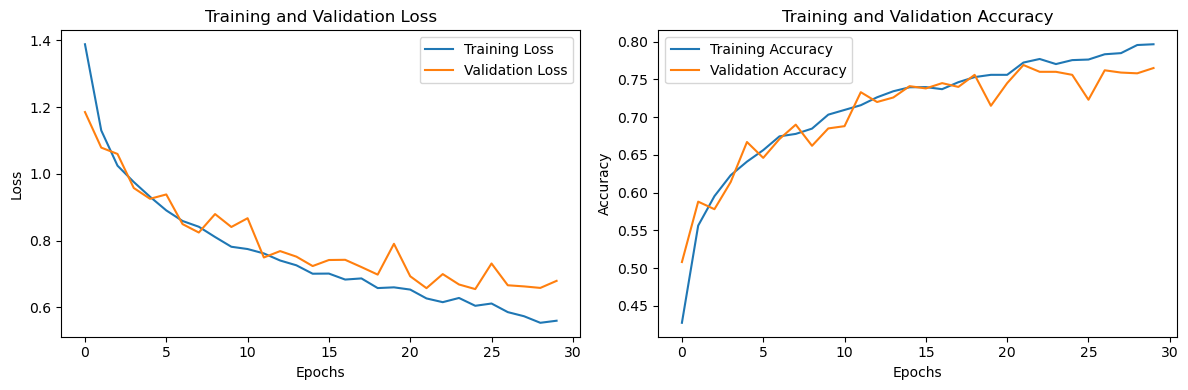

In [23]:
import matplotlib.pyplot as plt

def plot_history(history):
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')   # 학습 손실
    plt.plot(history.history['val_loss'], label='Validation Loss')  # 검증 손실
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')   # 학습 정확도
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')  # 검증 정확도
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_history(history)

##  <span style="font-weight: bold"> 8. 모델 평가  </span>
* model.evaluate(validation_generator)를 사용해 검증 데이터셋을 통해 모델의 손실과 정확도를 계산합니다.  
* validation_generator는 학습 중 검증에 사용된 이미지 데이터 제너레이터입니다.  
* loss는 검증 손실 값, accurcy는 검증 정확도 값

In [25]:
loss, accuracy = model.evaluate(validation_generator)

print(f"Validation Loss: {loss}")
print(f"Validation Accuracy: {accuracy}")

32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 162ms/step - accuracy: 0.7692 - loss: 0.6492
Validation Loss: 0.6409479975700378
Validation Accuracy: 0.7760000228881836


##  <span style="font-weight: bold"> 9. 예측 </span>
#### 모델이 지정된 이미지들 중 몇 개를 무작위로 선택하고 각 이미지를 모델을 통해 예측한 후 그 결과를 시각화하는 과정입니다.  
1. 랜덤으로 이미지 경로 선택
2. .jpg 파일들을 리스트로 가져오기
3. image.load_img()을 사용해 선택된 이미지를 로드하고 target_size에 맞게 조정
4. image.img_to_array()를 사용해 이미지 데이터를 배열로 변환
5. 로드된 이미지를 모델에 입력하여 예측을 수행하고 예측된 클래스를 np.argmax()를 사용해 가장 높은 확률을 가진 클래스로 결정
6. 각 이미지를 subplot에 표시, 예측된 클래스와 이미지의 제목으로 설정
7. 각 이미지에 대해 모델의 예측 확률 분포를 바 그래프로 표시해 시각적으로 비교

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


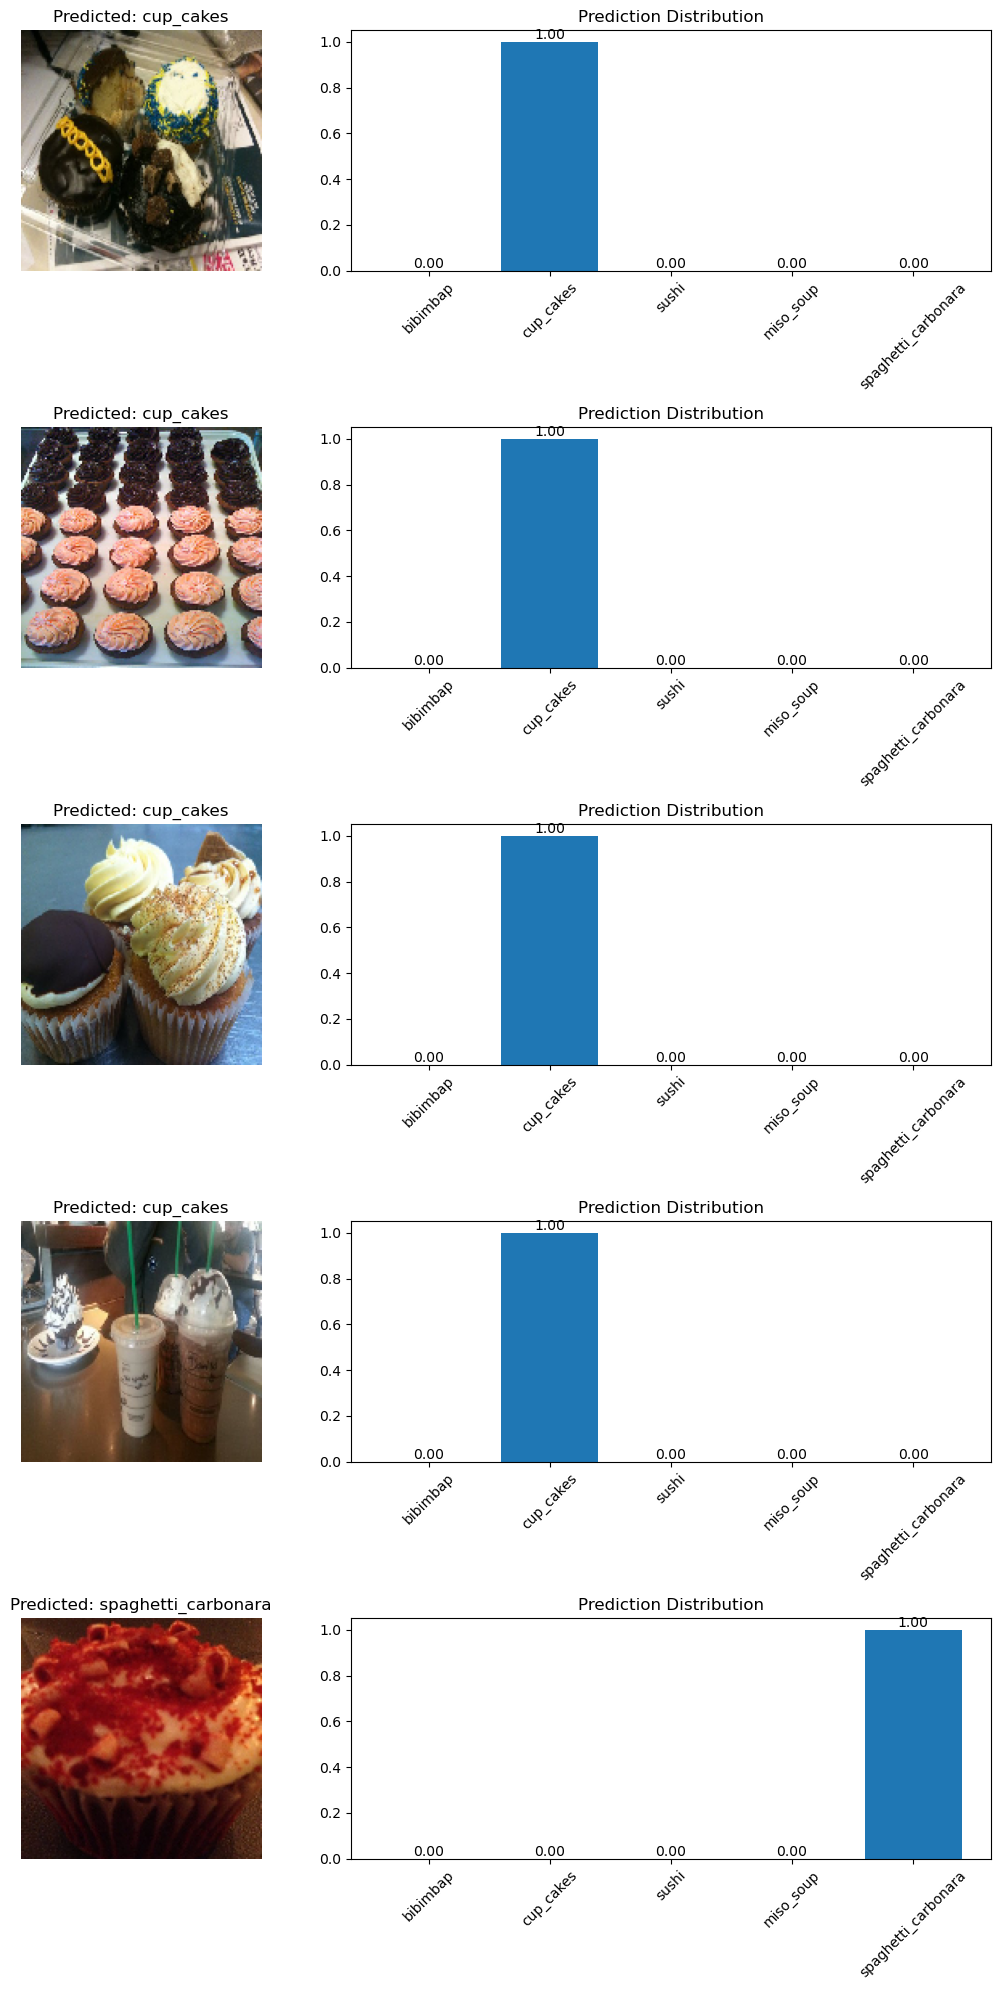

In [66]:
import numpy as np
import os
import random
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

base_dir = r"D:\USER\Desktop\food-5-classes"
classes = ['bibimbap', 'cup_cakes', 'sushi', 'miso_soup', 'spaghetti_carbonara']
target_size = (150, 150)

cup_cakes_dir = os.path.join(base_dir, 'cup_cakes')
cup_cakes_images = [os.path.join(cup_cakes_dir, fname) for fname in os.listdir(cup_cakes_dir) if fname.endswith('.jpg')]
num_images = 5  # 선택할 이미지 수
random_cup_cakes_images = random.sample(cup_cakes_images, num_images)  # 이미지 중 랜덤으로 선택

plt.figure(figsize=(12, 4 * num_images))   # 선택한 이미지 수에 따라 높이 설정

# 선택한 이미지에 대해 예측 및 시각화
for i, img_path in enumerate(random_cup_cakes_images):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)   # 이미지를 배열로 변환
    img_array = np.expand_dims(img_array, axis=0)  # 배치 차원 추가

    #모델을 통해 클래스 예측
    predictions = model.predict(img_array)
    predicted_class = classes[np.argmax(predictions)]   # 가장 높은 확률의 클래스를 예측 결과로 설정

    plt.subplot(num_images, 2, i * 2 + 1)
    plt.imshow(img)
    plt.title(f"Predicted: {predicted_class}")
    plt.axis('off')

    plt.subplot(num_images, 2, i * 2 + 2)
    plt.bar(classes, predictions[0])
    plt.title(f"Prediction Distribution")
    for j, prob in enumerate(predictions[0]):
        plt.text(j, prob, f"{prob:.2f}", ha='center', va='bottom')
    plt.xticks(rotation=45)
    plt.tight_layout()
    
# 그래프 출력
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


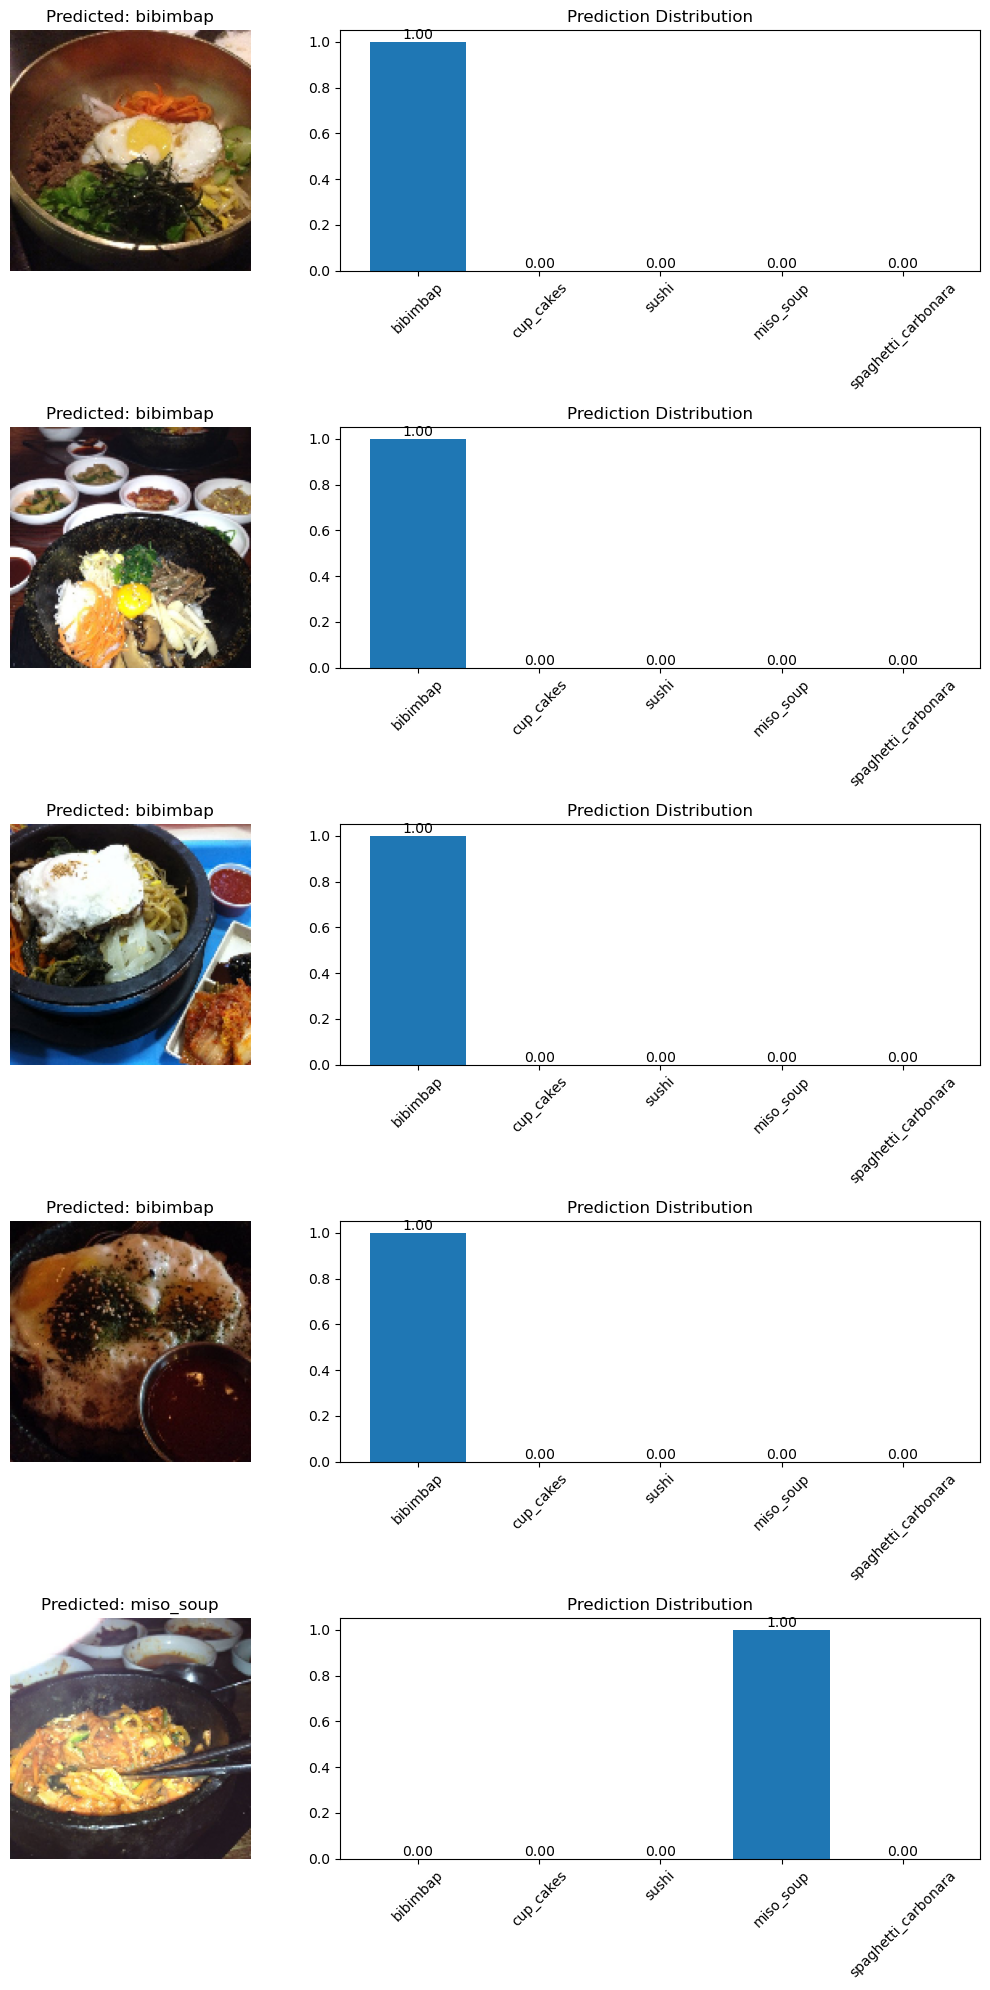

In [70]:
import numpy as np
import os
import random
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

base_dir = r"D:\USER\Desktop\food-5-classes"
classes = ['bibimbap', 'cup_cakes', 'sushi', 'miso_soup', 'spaghetti_carbonara']
target_size = (150, 150)

bibimbap_dir = os.path.join(base_dir, 'bibimbap')
bibimbap_images = [os.path.join(bibimbap_dir, fname) for fname in os.listdir(bibimbap_dir) if fname.endswith('.jpg')]
num_images = 5  # 선택할 이미지 수
random_bibimbap_images = random.sample(bibimbap_images, num_images)  # 이미지 중 랜덤으로 선택

plt.figure(figsize=(12, 4 * num_images))    # 선택한 이미지 수에 따라 높이 설정

# 선택한 이미지에 대해 예측 및 시각화
for i, img_path in enumerate(random_bibimbap_images):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)   # 이미지를 배열로 변환
    img_array = np.expand_dims(img_array, axis=0)   # 배치 차원 추가

    #모델을 통해 클래스 예측
    predictions = model.predict(img_array)
    predicted_class = classes[np.argmax(predictions)]     # 가장 높은 확률의 클래스를 예측 결과로 설정

    plt.subplot(num_images, 2, i * 2 + 1)
    plt.imshow(img)
    plt.title(f"Predicted: {predicted_class}")
    plt.axis('off')

    plt.subplot(num_images, 2, i * 2 + 2)
    plt.bar(classes, predictions[0])
    plt.title(f"Prediction Distribution")
    for j, prob in enumerate(predictions[0]):
        plt.text(j, prob, f"{prob:.2f}", ha='center', va='bottom')
    plt.xticks(rotation=45)
    plt.tight_layout()

# 그래프 출력
plt.show()

#### --- 모델의 성능을 평가 ---  
* precision : 예측 중 실제로 맞은 비율  
* recall : 실제 클래스 중 올바르게 예측된 비율  
* f1-score : precision과 recall의 조화 평균  
* support : 각 클래스에 속하는 샘플 수 

In [116]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

val_preds = model.predict(validation_generator)
val_preds_classes = np.argmax(val_preds, axis=1)
true_classes = validation_generator.classes

cm = confusion_matrix(true_classes, val_preds_classes)
print(cm)
print(classification_report(true_classes, val_preds_classes, target_names=classes))

32/32 ━━━━━━━━━━━━━━━━━━━━ 10s 304ms/step
[[44 38 39 40 39]
 [44 33 51 26 46]
 [46 36 48 40 30]
 [45 37 44 38 36]
 [43 27 50 39 41]]
                     precision    recall  f1-score   support

           bibimbap       0.20      0.22      0.21       200
          cup_cakes       0.19      0.17      0.18       200
              sushi       0.21      0.24      0.22       200
          miso_soup       0.21      0.19      0.20       200
spaghetti_carbonara       0.21      0.20      0.21       200

           accuracy                           0.20      1000
          macro avg       0.20      0.20      0.20      1000
       weighted avg       0.20      0.20      0.20      1000



##  <span style="font-weight: bold"> 10. 결론  </span>
<hr>  

* 모델 학습을 통해 음식 이미지 모델 예측을 구축.
* 시각화를 통해 모델 예측 성능 검증.
* 예측을 진행했을 때 80% 정도는 음식 이미지와 예측이 같지만 20% 정도는 음식 이미지와 예측이 달랐음.

<hr>

### <span style="font-weight:bold"> chat gpt 사용 </span>

코드를 간단하게 작성하고 데이터 경로를 chat gpt한테 알려주고 음식 이미지 분류할 수 있는 코드를 개선해달라고 얘기함.  
그 결과 개선할 점과 코드를 아래와 같이 알려줌

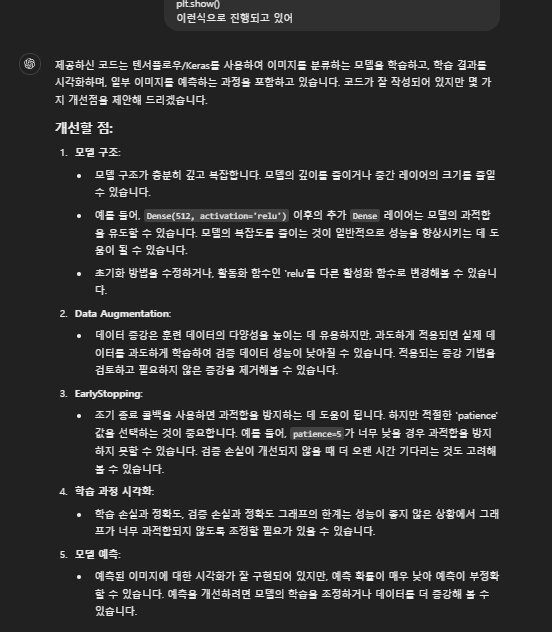

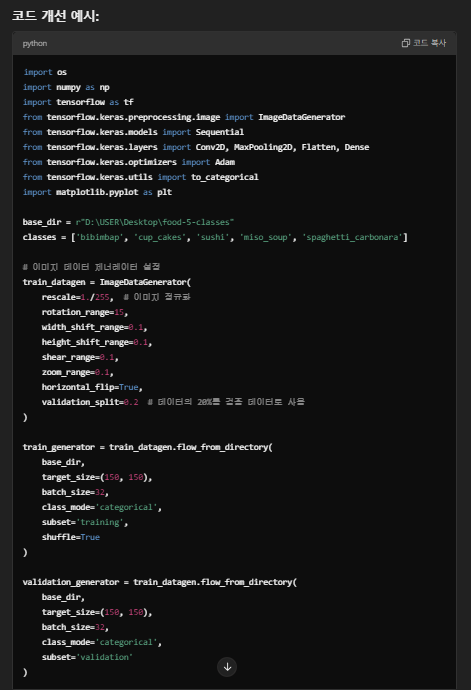

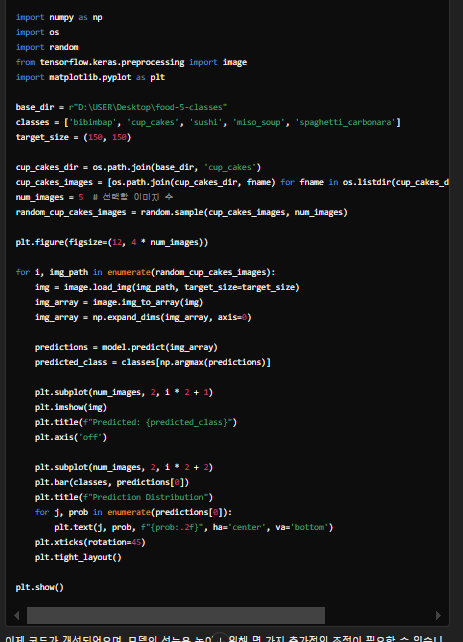

<hr> 


    
훈련 epoch 수가 부족한 거 같아 epoch 수를 늘려달라고 얘기함  

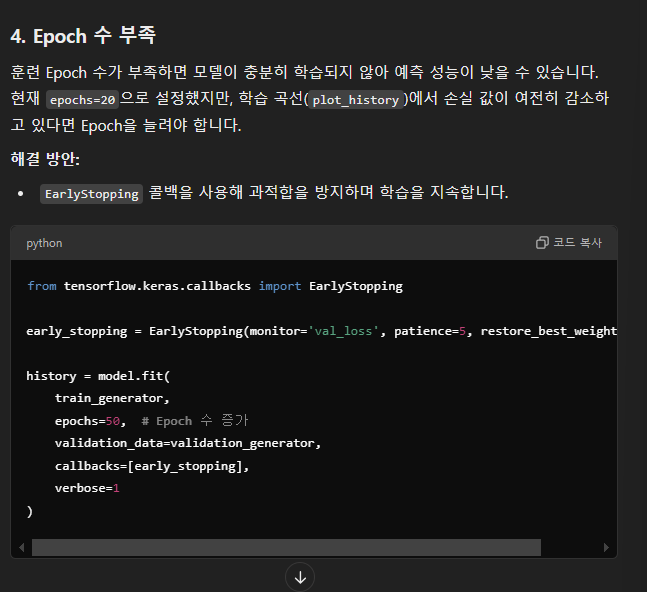